# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.1'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [26]:
VGG16 = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
VGG16.trainable = False

# model 1:
model = tf.keras.Sequential([
    VGG16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', name='dense_feature'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax'),
])
model.summary()

print("\n --------- \n")

Inception = tf.keras.applications.InceptionV3(weights="imagenet", include_top=False, input_shape=(224,224,3))
Inception.trainable = False

# model 2:
model2 = tf.keras.Sequential([
    Inception,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', name='dense_feature'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________

 --------- 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784 

#### [5 points] Train Model

In [27]:
# FIT MODEL 1
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#need to specify step size
history = model.fit(train_batches, batch_size=BATCH_SIZE, steps_per_epoch=STEP_SIZE_TRAIN, 
                    epochs=NUM_EPOCHS, validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

22
6
Epoch 1/100
21/21 [==============================] - 49s 2s/step - loss: 1.4548 - accuracy: 0.3932 - val_loss: 1.3317 - val_accuracy: 0.3800
Epoch 2/100
21/21 [==============================] - 55s 3s/step - loss: 1.2023 - accuracy: 0.4320 - val_loss: 1.2437 - val_accuracy: 0.4000
Epoch 3/100
21/21 [==============================] - 77s 4s/step - loss: 1.0604 - accuracy: 0.4951 - val_loss: 1.0137 - val_accuracy: 0.4800
Epoch 4/100
21/21 [==============================] - 53s 3s/step - loss: 0.9791 - accuracy: 0.5874 - val_loss: 1.0192 - val_accuracy: 0.5000
Epoch 5/100
21/21 [==============================] - 76s 4s/step - loss: 0.9570 - accuracy: 0.6311 - val_loss: 1.0725 - val_accuracy: 0.5200
Epoch 6/100
21/21 [==============================] - 61s 3s/step - loss: 0.9692 - accuracy: 0.5825 - val_loss: 1.0386 - val_accuracy: 0.5400
Epoch 7/100
21/21 [==============================] - 76s 4s/step - loss: 0.8479 - accuracy: 0.6262 - val_loss: 0.7860 - val_accuracy: 0.6400
Epoch 8/

Epoch 59/100
21/21 [==============================] - 47s 2s/step - loss: 0.5562 - accuracy: 0.7670 - val_loss: 0.7629 - val_accuracy: 0.6800
Epoch 60/100
21/21 [==============================] - 49s 2s/step - loss: 0.5508 - accuracy: 0.7913 - val_loss: 0.7212 - val_accuracy: 0.6000
Epoch 61/100
21/21 [==============================] - 51s 2s/step - loss: 0.5945 - accuracy: 0.7330 - val_loss: 0.6630 - val_accuracy: 0.7200
Epoch 62/100
21/21 [==============================] - 50s 2s/step - loss: 0.5712 - accuracy: 0.7233 - val_loss: 0.8970 - val_accuracy: 0.6400
Epoch 63/100
21/21 [==============================] - 46s 2s/step - loss: 0.5357 - accuracy: 0.7573 - val_loss: 0.6657 - val_accuracy: 0.7200
Epoch 64/100
21/21 [==============================] - 51s 2s/step - loss: 0.5916 - accuracy: 0.7427 - val_loss: 0.6654 - val_accuracy: 0.6400
Epoch 65/100
21/21 [==============================] - 48s 2s/step - loss: 0.5359 - accuracy: 0.7621 - val_loss: 0.6856 - val_accuracy: 0.6800
Epoch 

#### [5 points] Plot Accuracy and Loss During Training

Text(0.5, 1.0, 'Accuracy over 100 epochs (model1)')

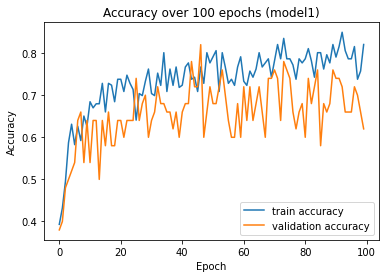

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over ' + str(NUM_EPOCHS) + ' epochs (model1)')
#print(str(history.history['loss']))

Text(0.5, 1.0, 'Loss over 100 epochs (model1)')

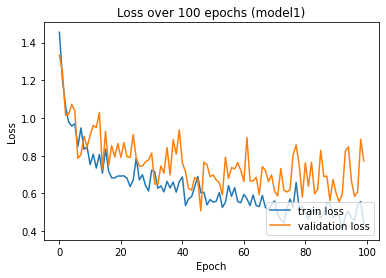

In [29]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Loss over ' + str(NUM_EPOCHS) + ' epochs (model1)')

In [17]:
# FIT MODEL 2

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#need to specify step size
history2 = model2.fit(train_batches, batch_size=BATCH_SIZE, steps_per_epoch=STEP_SIZE_TRAIN, 
                    epochs=NUM_EPOCHS, validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

Epoch 1/100
21/21 [==============================] - 18s 846ms/step - loss: 0.8930 - accuracy: 0.6505 - val_loss: 0.9066 - val_accuracy: 0.6200
Epoch 2/100
21/21 [==============================] - 14s 665ms/step - loss: 0.8350 - accuracy: 0.6845 - val_loss: 0.8473 - val_accuracy: 0.5600
Epoch 3/100
21/21 [==============================] - 14s 656ms/step - loss: 0.7179 - accuracy: 0.7184 - val_loss: 0.6429 - val_accuracy: 0.7600
Epoch 4/100
21/21 [==============================] - 18s 875ms/step - loss: 0.6281 - accuracy: 0.7379 - val_loss: 0.8378 - val_accuracy: 0.5600
Epoch 5/100
21/21 [==============================] - 16s 750ms/step - loss: 0.6497 - accuracy: 0.7233 - val_loss: 0.7033 - val_accuracy: 0.7200
Epoch 6/100
21/21 [==============================] - 16s 759ms/step - loss: 0.6294 - accuracy: 0.7573 - val_loss: 0.9428 - val_accuracy: 0.7000
Epoch 7/100
21/21 [==============================] - 14s 657ms/step - loss: 0.5966 - accuracy: 0.7427 - val_loss: 0.9722 - val_accuracy:

21/21 [==============================] - 15s 733ms/step - loss: 0.4119 - accuracy: 0.8107 - val_loss: 0.7462 - val_accuracy: 0.6800
Epoch 58/100
21/21 [==============================] - 15s 724ms/step - loss: 0.3977 - accuracy: 0.8495 - val_loss: 0.7064 - val_accuracy: 0.6800
Epoch 59/100
21/21 [==============================] - 15s 730ms/step - loss: 0.4709 - accuracy: 0.8204 - val_loss: 0.6579 - val_accuracy: 0.7400
Epoch 60/100
21/21 [==============================] - 15s 704ms/step - loss: 0.4447 - accuracy: 0.8252 - val_loss: 0.5647 - val_accuracy: 0.7400
Epoch 61/100
21/21 [==============================] - 14s 679ms/step - loss: 0.4504 - accuracy: 0.8301 - val_loss: 0.6716 - val_accuracy: 0.7200
Epoch 62/100
21/21 [==============================] - 15s 712ms/step - loss: 0.4940 - accuracy: 0.7961 - val_loss: 0.6642 - val_accuracy: 0.6800
Epoch 63/100
21/21 [==============================] - 13s 622ms/step - loss: 0.3833 - accuracy: 0.8252 - val_loss: 1.2110 - val_accuracy: 0.560

Text(0.5, 1.0, 'Accuracy over 100 epochs (model2)')

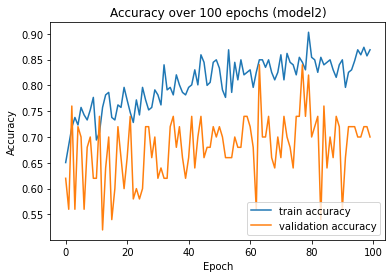

In [18]:
plt.plot(history2.history['accuracy'], label='train accuracy')
plt.plot(history2.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over ' + str(NUM_EPOCHS) + ' epochs (model2)')

Text(0.5, 1.0, 'Loss over 100 epochs (model2)')

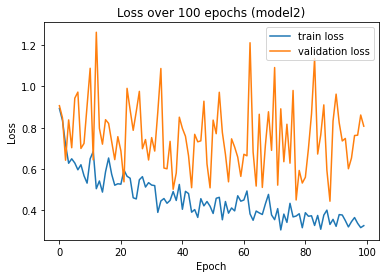

In [22]:
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over ' + str(NUM_EPOCHS) + ' epochs (model2)')

#### Testing Model

In [30]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 7s 183ms/step - loss: 0.7414 - accuracy: 0.7222
Test loss: 0.7414432764053345
Test accuracy: 0.7222222089767456


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.

LEGEND:
blue = covid
green = normal
red = pneumonia_bacterial
yellow = pneumonia_viral


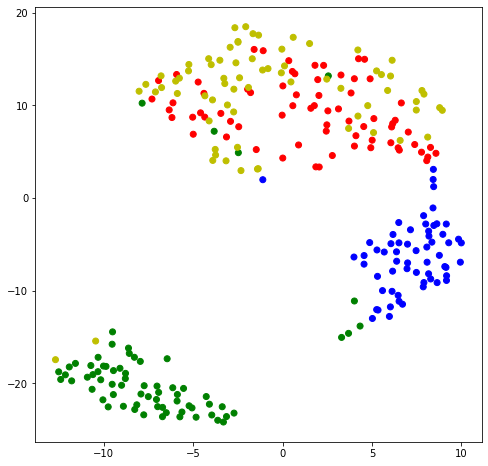

In [50]:
from sklearn.manifold import TSNE
from tensorflow.keras import models

intermediate_layer_model = models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,class_mode="categorical")

labels = tsne_eval_generator.labels
colors = []
for i in range(len(labels)):
    if labels[i] == 0:
        colors += 'b'
    elif labels[i] == 1:
        colors += 'g'
    elif labels[i] == 2:
        colors += 'r'
    else:
        colors += 'y'

layer = intermediate_layer_model.predict(tsne_eval_generator)
tsne = TSNE(n_components=2)
intermediate_tsne = tsne.fit_transform(layer)

print("\nLEGEND:")
print("blue = covid")
print("green = normal")
print("red = pneumonia_bacterial")
print("yellow = pneumonia_viral")

plt.figure(figsize=(8, 8))
plt.scatter(x = intermediate_tsne[:,0], y=intermediate_tsne[:,1], c=colors)
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->